<a href="https://colab.research.google.com/github/shrishankar-desai/Linkedin-Mining/blob/main/linkedin_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linkedin Mining

In [14]:
import requests
import string
import random
from urllib.parse import urlencode

# OAuth 2.0 credentials
CLIENT_ID = '###########'
CLIENT_SECRET = '#############'
REDIRECT_URI = 'https://www.linkedin.com/in/shrishankar-desai/'

# Generate CSRF Token
letters = string.ascii_lowercase
CSRF_TOKEN = ''.join(random.choice(letters) for i in range(24))

# Prepare authorization URL
auth_params = {
    'response_type': 'code',
    'client_id': CLIENT_ID,
    'redirect_uri': REDIRECT_URI,
    'state': CSRF_TOKEN,
    'scope': 'openid profile email w_member_social'
}



# Build authorization URL
auth_url = 'https://www.linkedin.com/oauth/v2/authorization?' + urlencode(auth_params)
print("Go to the following URL to authorize the application:\n")
print(auth_url)


Go to the following URL to authorize the application:

https://www.linkedin.com/oauth/v2/authorization?response_type=code&client_id=86ikp7ftdn0o8r&redirect_uri=https%3A%2F%2Fwww.linkedin.com%2Fin%2Fshrishankar-desai%2F&state=amwyukqnrkegkdofvqoxmtpy&scope=openid+profile+email+w_member_social


In [21]:
AUTH_CODE ='#################'
token_data = {
    'grant_type': 'authorization_code',
    'code': AUTH_CODE,
    'redirect_uri': REDIRECT_URI,
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET
}

# Send the POST request to exchange the code for an access token
response = requests.post('https://www.linkedin.com/oauth/v2/accessToken', data=token_data)

# Check the response and extract the access token
if response.status_code == 200:
    access_token = response.json()['access_token']
    print(f'Access Token: {access_token}')
else:
    print(f'Error: {response.status_code}, {response.text}')



Access Token: AQU71Bfbr5CMzAhD7gTsaDEmOd3I9g1J5pPVToOwGbURdtcUjdn7Jzd41FLixLqGZ-sxaHWSYQeAZNBSMidsDZxB9AnMUdc8eHyQggVrbp7oliEpNfq_boUrgc3FzCQtIaNYAvxwZ0gYOHdzLW4mBd4SLwQnPqeT-7uvJrDFE3-9UuObn4DgjRcp3mfLZsxQuw4okDP_Axc3nkD-INY70Qs0_EWj69oV6iBcthiYcauT7qfU9i2HZ74P48efD5_KudDFk5KrviGMKHdbGf9JHNGa2TJ0ijupBYoTIzg0J5CMAuY0C-F0mH-k15mgDqKnVzCLM3ZWeaqzA65GquESUBO4I9qj-Q


In [23]:
import json
headers = {
    'Authorization': f'Bearer {access_token}'
}
response = requests.get('https://api.linkedin.com/v2/userinfo', headers=headers)
print (json.dumps (response.json(), indent=1))


{
 "sub": "72IOxiXs-4",
 "email_verified": true,
 "name": "shrishankar shripadarao desai",
 "locale": {
  "country": "US",
  "language": "en"
 },
 "given_name": "shrishankar",
 "family_name": "shripadarao desai",
 "email": "sxs3907@mavs.uta.edu",
 "picture": "https://media.licdn.com/dms/image/v2/D5603AQEXdhRa8tE8IQ/profile-displayphoto-shrink_100_100/profile-displayphoto-shrink_100_100/0/1704642206822?e=1740614400&v=beta&t=FNmJQxH4724NaxCDuFRzaZnoHhv6_uhOqEHwhuAHt3c"
}


In [102]:
import pandas as pd

df = pd.read_csv('/Connections.csv')

In [103]:
df.head()

,First Name,Last Name,URL,Email Address,Company,Position,Connected On
0,Rishika,Endal,https://www.linkedin.com/in/rishika-endal-9669...,NaN,Western Union,Software Developer,23-Dec-24
1,Bill,Holt,https://www.linkedin.com/in/4billholt,NaN,"Citi (Software Guidance & Assistance, Inc.)",Business Analyst,21-Dec-24
2,Ariel,Law,https://www.linkedin.com/in/ariel-law-219b41bb,NaN,Texas Woman's University,Adelante Mentor,21-Dec-24
3,Vishnu,vardhan,https://www.linkedin.com/in/vishnu-vardhan-277...,NaN,NaN,NaN,20-Dec-24
4,Faizul,Sk,https://www.linkedin.com/in/faizul-sk-365a47336,NaN,NaN,NaN,20-Dec-24


In [104]:
len(df)

1121

In [105]:
df.isna().sum()

,0
First Name,88
Last Name,88
URL,88
Email Address,1105
Company,187
Position,187
Connected On,0


In [106]:
df = df.dropna(subset=['First Name'])

In [107]:
df.drop(['URL', 'Email Address','Connected On'], axis=1, inplace=True)
df.head()

,First Name,Last Name,Company,Position
0,Rishika,Endal,Western Union,Software Developer
1,Bill,Holt,"Citi (Software Guidance & Assistance, Inc.)",Business Analyst
2,Ariel,Law,Texas Woman's University,Adelante Mentor
3,Vishnu,vardhan,NaN,NaN
4,Faizul,Sk,NaN,NaN


In [108]:
company_counts = df['Company'].value_counts()
print(company_counts)

Company
The University of Texas at Arlington    57
Tata Consultancy Services               29
Infosys                                 12
Cognizant                               10
University of North Texas                8
                                        ..
MassMutual                               1
Oncor Electric Delivery                  1
Infinite Computer Solutions              1
Freelancer                               1
Dell EMC                                 1
Name: count, Length: 664, dtype: int64


In [109]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()
for col in ['First Name', 'Last Name', 'Company', 'Position']:
    df[col] = encoder.fit_transform(df[col])

In [110]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df)

print(pd.DataFrame(data_scaled, columns=df.columns))

      First Name  Last Name   Company  Position
0       0.429137  -0.961587  1.271670  0.776751
1      -1.301814  -0.642998 -1.208419 -1.416623
2      -1.453372  -0.218212  0.860739 -1.692954
3       1.549868   1.744113  1.397366  1.479091
4      -0.998698   1.074614  1.397366  1.479091
...          ...        ...       ...       ...
1028    1.254729  -0.693788 -1.590343  1.415765
1029    1.494031   0.428201 -0.091654 -0.040727
1030   -0.484199  -0.333643 -1.039212 -1.491463
1031    0.524858  -0.910798 -1.010205 -1.203619
1032    0.034289  -0.559888  0.193581 -0.466737

[1033 rows x 4 columns]


In [111]:
from sklearn.cluster import KMeans
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

df['Cluster'] = clusters
print(df)

      First Name  Last Name  Company  Position  Cluster
0            541        170      638       437        0
1            107        239      125        56        1
2             69        331      553         8        1
3            822        756      664       559        0
4            183        611      664       559        0
...          ...        ...      ...       ...      ...
1116         748        228       46       548        1
1117         808        471      356       295        1
1118         312        306      160        43        1
1119         565        181      166        93        1
1120         442        257      415       221        1

[1033 rows x 5 columns]


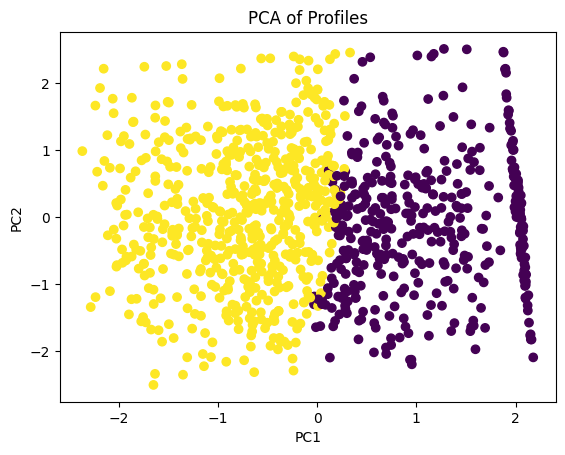

In [112]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Visualize clusters
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='viridis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Profiles')
plt.show()


<ipython-input-113-587e8966139d>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Position', data=position_data, palette='viridis')


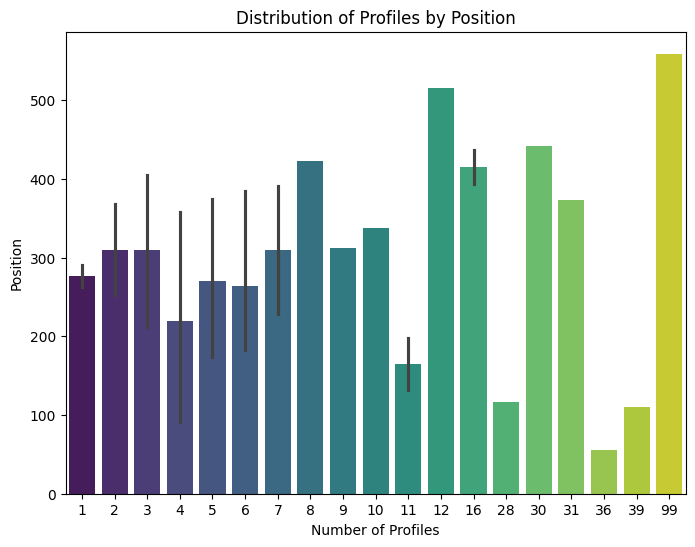

In [113]:
import seaborn as sns

position_counts = df['Position'].value_counts()
position_data = position_counts.reset_index()
position_data.columns = ['Position', 'Count']
plt.figure(figsize=(8, 6))
sns.barplot(x='Count', y='Position', data=position_data, palette='viridis')
plt.title('Distribution of Profiles by Position')
plt.xlabel('Number of Profiles')
plt.ylabel('Position')
plt.show()

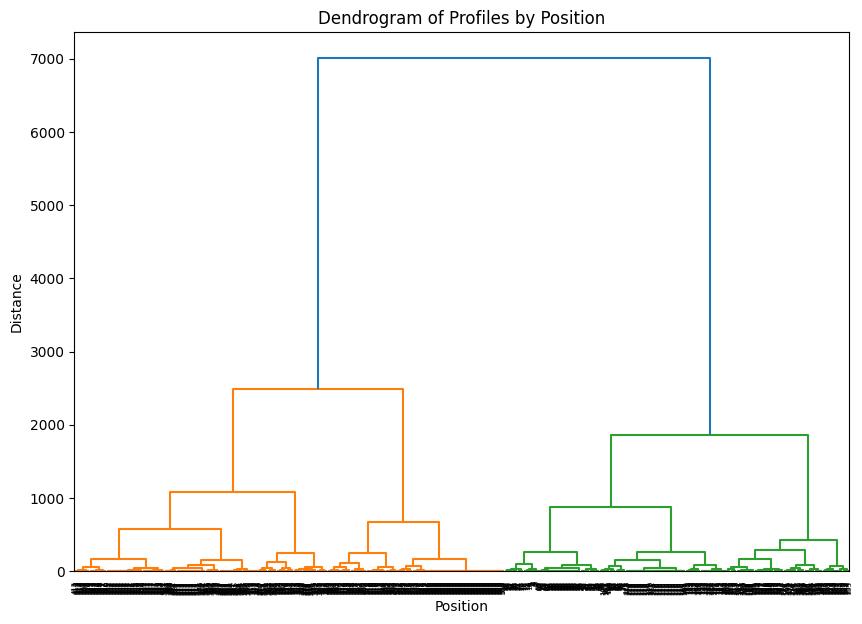

In [114]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

df['Position_encoded'] = encoder.fit_transform(df['Position'])
linked = linkage(df['Position_encoded'].values.reshape(-1, 1), method='ward')

plt.figure(figsize=(10, 7))
dendrogram(linked, labels=df['Position'].values, orientation='top', distance_sort='descending')
plt.title('Dendrogram of Profiles by Position')
plt.xlabel('Position')
plt.ylabel('Distance')
plt.show()